#Sentiment Analysis I


##Table of contents:
* Example: Twitter Analysis during the Russian-Ukraine Crisis
  * Data Preprocessing
  * EDA
  * Feature Extraction
  * ML Model Predictions
  * Cross Validation
  * Evaluation

###Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Import Libraries

In [ ]:
# For dataframes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing all nltk related libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('all')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression

#To get subjectivity and polarity, import textblob
from textblob import TextBlob

# importing Regular Expressions
import re
import string

# Bag of Words representation
import collections
from sklearn.feature_extraction.text import CountVectorizer

#Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Logistic Regression
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedShuffleSplit
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Grid Search
from sklearn.model_selection import GridSearchCV

#LinearSVC
from sklearn.svm import LinearSVC

#SGD classifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

#To ignore warning
import warnings
warnings.filterwarnings("ignore")

#Emotion
!pip install nrclex
from nrclex import NRCLex

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Import Data

In [ ]:
data_sentiment = pd.read_csv('/content/drive/My Drive/ukrainerussian_csv.csv')

In [ ]:
data_sentiment.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1590510105598259201,1590510105598259201,2022-11-10 01:02:14 UTC,2022-11-10,01:02:14,0,1162601483856039936,sumanth09315243,WAGMIFestival.eth,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1590510093610909698,1589760170938470400,2022-11-10 01:02:11 UTC,2022-11-10,01:02:11,0,1085482994176012288,liberalismisco1,Liberalism is Cool,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'bjovan3', 'name': '🇷🇸 مها', ...",NaN,NaN,NaN,NaN
2,1590510091157274624,1590035806433210368,2022-11-10 01:02:10 UTC,2022-11-10,01:02:10,0,19697793,crypto_knight_3,Big Phil 🍥,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Trollstoy88', 'name': 'Troll...",NaN,NaN,NaN,NaN
3,1590510084802883584,1590510084802883584,2022-11-10 01:02:09 UTC,2022-11-10,01:02:09,0,3627349575,engineer_psych,Dark6Light,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1590510082969989120,1590508019862843392,2022-11-10 01:02:08 UTC,2022-11-10,01:02:08,0,1541625790634270720,deonrichar1,The In Your Face Show W/Dion DB😅🤗🇺🇸⚖️🕙🙏✨,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'hrkbenowen', 'name': 'Ben Ow...",NaN,NaN,NaN,NaN


##Explanation on what we are looking out for:
* What are we trying to tackle?
  *  Indulge in such a topic where we analyse the emotions of the general public as tensions
continued to arise between Russian and Ukraine supporters. Therefore, we are doing sentiment analysis on
the Ukraine-Russia War on Twitter.
* Objectives:
  * Identify the mental state of the general public based on the comments extracted from the tweets on Twitter
  * Understand how this conflict has affected the general public using sentiment analysis
  * Data Source: https://www.kaggle.com/datasets/towhidultonmoy/russia-vs-ukraine-tweets-datasetdaily-updated
* Evaluation Method
  * Logistic Regression
    * Divide the training set into the relative emotions expressed in the tweets. Then, it counts all the words and makes a python dictionary of their frequencies of the positive and negative emotions.
  * Decision Tree Classifier
    * Supervised learning approach used in data mining
    * Used as a predictive model to draw conclusions based on a set of observations

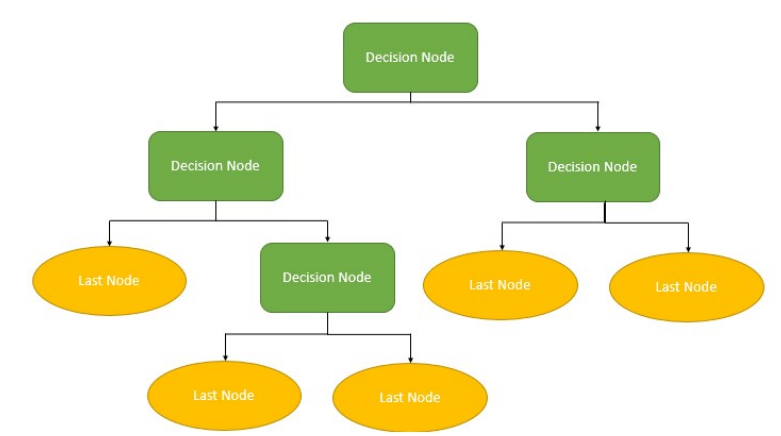

* Evaluation metrics
  * Precision
  * Recall
  * F-score
  * Accuracy is an evaluation metric that allows you to measure the total number of predictions a model gets right

##Inspect the data & Explore Data

In [ ]:
# Retrieve all the columns within the dataframe
data_sentiment.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [ ]:
# View the trpes of data collected in each column of the data frame
data_sentiment.dtypes

id                   int64
conversation_id      int64
created_at          object
date                object
time                object
timezone             int64
user_id              int64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet               bool
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

In [ ]:
#The main set of data we will be preprocessing for detecting emotions -> Tweet column
data_sentiment['tweet']

0        @jensstoltenberg Nato/otan is the most terrori...
1        @bjovan3 @KimDotcom You’re talking as if it wa...
2        @Trollstoy88 Bet russia wishes it hadnt wasted...
3        On the last meeting Lukashenko and Putin talki...
4        @hrkbenowen Why wouldn't he be? Russia (not th...
                               ...                        
10004    Ukraine has won the war. Russia is leaving Ukr...
10005    Biden says it remains to be seen if the Kherso...
10006    Talks with Russia? No way, say Ukrainians | Ru...
10007    @DylanBurns1776 Supporting kurds to sow divisi...
10008    @Breaking911 I voted for him last time, can’t ...
Name: tweet, Length: 10009, dtype: object

In [ ]:
# Extracting columns required to perform sentiment analysis
unprocessed_tweet_data = pd.DataFrame({'Tweet': pd.Series(data_sentiment['tweet']), 'Language tweet was in': pd.Series(data_sentiment['language']), 'Time': pd.Series(data_sentiment['time'])})

In [ ]:
unprocessed_tweet_data.head()

,Tweet,Language tweet was in,Time
0,@jensstoltenberg Nato/otan is the most terrori...,en,01:02:14
1,@bjovan3 @KimDotcom You’re talking as if it wa...,en,01:02:11
2,@Trollstoy88 Bet russia wishes it hadnt wasted...,en,01:02:10
3,On the last meeting Lukashenko and Putin talki...,en,01:02:09
4,@hrkbenowen Why wouldn't he be? Russia (not th...,en,01:02:08


In [ ]:
# Checking for null values
unprocessed_tweet_data.isnull().sum()

Tweet                    0
Language tweet was in    0
Time                     0
dtype: int64

##EDA

### Plot a bar graph to show the distribution of the top 5 languages reflected in the twitter dataset

In [ ]:
# Checking majority of which language is dominating in the twitter dataset
unprocessed_tweet_data[unprocessed_tweet_data['Language tweet was in']=='en']

,Tweet,Language tweet was in,Time
0,@jensstoltenberg Nato/otan is the most terrori...,en,01:02:14
1,@bjovan3 @KimDotcom You’re talking as if it wa...,en,01:02:11
2,@Trollstoy88 Bet russia wishes it hadnt wasted...,en,01:02:10
3,On the last meeting Lukashenko and Putin talki...,en,01:02:09
4,@hrkbenowen Why wouldn't he be? Russia (not th...,en,01:02:08
...,...,...,...
10004,Ukraine has won the war. Russia is leaving Ukr...,en,21:52:30
10005,Biden says it remains to be seen if the Kherso...,en,21:52:29
10006,"Talks with Russia? No way, say Ukrainians | Ru...",en,21:52:29
10007,@DylanBurns1776 Supporting kurds to sow divisi...,en,21:52:28


In [ ]:
# Printing out unique row data in the langauge column
print(unprocessed_tweet_data["Language tweet was in"].unique())

['en' 'qme' 'pt' 'nl' 'it' 'ca' 'in' 'und' 'ta' 'ja' 'fr' 'zh' 'vi' 'ro'
 'th' 'de' 'ht' 'es' 'qht' 'ur' 'ru' 'fi' 'ar' 'cs' 'pl' 'hi' 'tl' 'tr'
 'no' 'et' 'uk' 'el' 'da' 'qam' 'iw' 'sv' 'lt' 'bg']


In [ ]:
# Counting the number of each language type using value_counts() function
unprocessed_tweet_data['Language tweet was in'].value_counts()

en     8793
pt      343
it      232
qme     138
und      80
in       54
th       53
es       38
vi       37
ru       36
ca       34
de       27
ja       26
fr       25
nl       13
ar       11
qht       9
fi        8
pl        6
ro        5
zh        5
et        4
cs        4
uk        4
hi        4
tl        4
no        2
ht        2
tr        2
qam       2
lt        1
sv        1
iw        1
ur        1
da        1
el        1
ta        1
bg        1
Name: Language tweet was in, dtype: int64

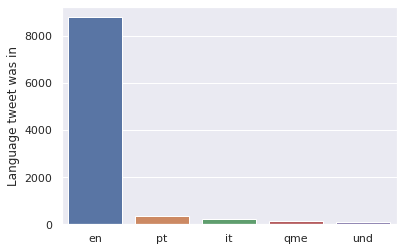

In [ ]:
# Plotting the Bar Graph
# Setting theme for the sns background
sns.set_theme(style='darkgrid')
#Plot bar graph using barplot() function
sns.barplot(x= unprocessed_tweet_data['Language tweet was in'].value_counts()[:5].index,y=unprocessed_tweet_data['Language tweet was in'].value_counts()[:5])

We will now be taking the tweet data that are in english language

##Data Cleaning

In [ ]:
unprocessed_tweet_data_en = unprocessed_tweet_data[unprocessed_tweet_data['Language tweet was in']=="en"]

In [ ]:
unprocessed_tweet_data_en

,Tweet,Language tweet was in,Time
0,@jensstoltenberg Nato/otan is the most terrori...,en,01:02:14
1,@bjovan3 @KimDotcom You’re talking as if it wa...,en,01:02:11
2,@Trollstoy88 Bet russia wishes it hadnt wasted...,en,01:02:10
3,On the last meeting Lukashenko and Putin talki...,en,01:02:09
4,@hrkbenowen Why wouldn't he be? Russia (not th...,en,01:02:08
...,...,...,...
10004,Ukraine has won the war. Russia is leaving Ukr...,en,21:52:30
10005,Biden says it remains to be seen if the Kherso...,en,21:52:29
10006,"Talks with Russia? No way, say Ukrainians | Ru...",en,21:52:29
10007,@DylanBurns1776 Supporting kurds to sow divisi...,en,21:52:28


In [ ]:
# Setting lemmatizer variable
lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

In [ ]:
# Processing Tweet data
def tweet_processor(tweet_data):
  #Changing all tweet texts to be lowercase
  tweet_data = str(tweet_data).lower()

  #Removing punctuation
  tweet_data = re.sub('\[.*?\]', '', tweet_data)

  #Removing special characters and numbers
  tweet_data = re.sub("[^a-z\s]", "", tweet_data)

  #Removing hashtags
  tweet_data = re.sub("#", " ", tweet_data)

  #Removing RT
  tweet_data = re.sub("RT[\s]+", "", tweet_data)

  #Removing hyperlinks
  tweet_data = re.sub('https?://\S+|www\.\S+', '', tweet_data)

  tweet_data = re.sub('<.*?>+', '', tweet_data)

  tweet_data = re.sub('[%s]' % re.escape(string.punctuation), '', tweet_data)

  #Removing lines separated by \n
  tweet_data = re.sub('\n', '', tweet_data)

  tweet_data = re.sub('\w*\d\w*', '', tweet_data)

  #Removing stopwords
  tweet_data = re.sub('\w*\d\w*', '', tweet_data)

  #Removing stopwords
  tweet_data = [word for word in tweet_data.split(' ') if word not in stopword]
  tweet_data =" ".join(tweet_data)

  #Lemmatisation
  tweet_data = [lemmatizer.lemmatize(word) for word in tweet_data.split(' ')]
  tweet_data=" ".join(tweet_data)
  #tweet_data=",".join([str(i) for i in tweet_data])
  return tweet_data

In [ ]:
#Copying dataframe and storing it in a new dataframe
processed_tweet_data = unprocessed_tweet_data_en

In [ ]:
#Applying the tweet_processor function created
processed_tweet_data['Reviewed_Tweet'] = unprocessed_tweet_data_en['Tweet'].apply(tweet_processor)

In [ ]:
processed_tweet_data

,Tweet,Language tweet was in,Time,Reviewed_Tweet
0,@jensstoltenberg Nato/otan is the most terrori...,en,01:02:14,jensstoltenberg natootan terrorist organizatio...
1,@bjovan3 @KimDotcom You’re talking as if it wa...,en,01:02:11,bjovan kimdotcom youre talking ukraine invaded...
2,@Trollstoy88 Bet russia wishes it hadnt wasted...,en,01:02:10,trollstoy bet russia wish hadnt wasted syria
3,On the last meeting Lukashenko and Putin talki...,en,01:02:09,last meeting lukashenko putin talking respect ...
4,@hrkbenowen Why wouldn't he be? Russia (not th...,en,01:02:08,hrkbenowen wouldnt russia im putinpuppet aint ...
...,...,...,...,...
10004,Ukraine has won the war. Russia is leaving Ukr...,en,21:52:30,ukraine war russia leaving ukraine heavy loss ...
10005,Biden says it remains to be seen if the Kherso...,en,21:52:29,biden say remains seen kherson withdrawal lead...
10006,"Talks with Russia? No way, say Ukrainians | Ru...",en,21:52:29,talk russia way say ukrainian russiaukraine w...
10007,@DylanBurns1776 Supporting kurds to sow divisi...,en,21:52:28,dylanburns supporting kurd sow division iran s...


In [ ]:
# Displaying processed tweet data
processed_tweet_data['Reviewed_Tweet']

0        jensstoltenberg natootan terrorist organizatio...
1        bjovan kimdotcom youre talking ukraine invaded...
2             trollstoy bet russia wish hadnt wasted syria
3        last meeting lukashenko putin talking respect ...
4        hrkbenowen wouldnt russia im putinpuppet aint ...
                               ...                        
10004    ukraine war russia leaving ukraine heavy loss ...
10005    biden say remains seen kherson withdrawal lead...
10006    talk russia way say ukrainian  russiaukraine w...
10007    dylanburns supporting kurd sow division iran s...
10008    breaking voted last time cant say im  year dem...
Name: Reviewed_Tweet, Length: 8793, dtype: object

##More EDA

In [ ]:
#Subjectivity of the processed data
#Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [ ]:
#Polarity of the processed data
#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
#Creating columns to display subjectivity and polarity
processed_tweet_data['Subjectivity'] = processed_tweet_data['Reviewed_Tweet'].apply(getSubjectivity)
processed_tweet_data['Polarity'] = processed_tweet_data['Reviewed_Tweet'].apply(getPolarity)

In [ ]:
processed_tweet_data

,Tweet,Language tweet was in,Time,Reviewed_Tweet,Subjectivity,Polarity
0,@jensstoltenberg Nato/otan is the most terrori...,en,01:02:14,jensstoltenberg natootan terrorist organizatio...,0.227273,0.068182
1,@bjovan3 @KimDotcom You’re talking as if it wa...,en,01:02:11,bjovan kimdotcom youre talking ukraine invaded...,0.644444,0.100000
2,@Trollstoy88 Bet russia wishes it hadnt wasted...,en,01:02:10,trollstoy bet russia wish hadnt wasted syria,0.000000,-0.200000
3,On the last meeting Lukashenko and Putin talki...,en,01:02:09,last meeting lukashenko putin talking respect ...,0.066667,0.000000
4,@hrkbenowen Why wouldn't he be? Russia (not th...,en,01:02:08,hrkbenowen wouldnt russia im putinpuppet aint ...,0.000000,0.000000
...,...,...,...,...,...,...
10004,Ukraine has won the war. Russia is leaving Ukr...,en,21:52:30,ukraine war russia leaving ukraine heavy loss ...,0.500000,-0.200000
10005,Biden says it remains to be seen if the Kherso...,en,21:52:29,biden say remains seen kherson withdrawal lead...,0.750000,0.250000
10006,"Talks with Russia? No way, say Ukrainians | Ru...",en,21:52:29,talk russia way say ukrainian russiaukraine w...,0.000000,0.000000
10007,@DylanBurns1776 Supporting kurds to sow divisi...,en,21:52:28,dylanburns supporting kurd sow division iran s...,0.375000,0.375000


###Word Cloud

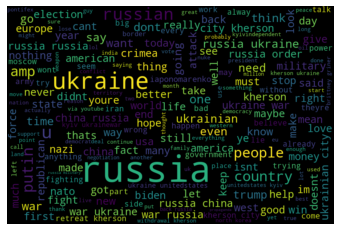

In [ ]:
allTweets = ' '.join([tweets for tweets in processed_tweet_data['Reviewed_Tweet']])
RU_wordcloud=WordCloud(width=900, height=600, random_state=21, max_font_size=100).generate(allTweets)
plt.imshow(RU_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

###Computing negative, neutral and positive analysis

In [ ]:
def getComputation(score):
    if score < -0.5:
        return 'Very Negative'
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    elif score > 0:
        return 'Positive'
processed_tweet_data['Computation_Analysis'] = processed_tweet_data['Polarity'].apply(getComputation)

In [ ]:
processed_tweet_data

,Tweet,Language tweet was in,Time,Reviewed_Tweet,Subjectivity,Polarity,Computation_Analysis
0,@jensstoltenberg Nato/otan is the most terrori...,en,01:02:14,jensstoltenberg natootan terrorist organizatio...,0.227273,0.068182,Positive
1,@bjovan3 @KimDotcom You’re talking as if it wa...,en,01:02:11,bjovan kimdotcom youre talking ukraine invaded...,0.644444,0.100000,Positive
2,@Trollstoy88 Bet russia wishes it hadnt wasted...,en,01:02:10,trollstoy bet russia wish hadnt wasted syria,0.000000,-0.200000,Negative
3,On the last meeting Lukashenko and Putin talki...,en,01:02:09,last meeting lukashenko putin talking respect ...,0.066667,0.000000,Neutral
4,@hrkbenowen Why wouldn't he be? Russia (not th...,en,01:02:08,hrkbenowen wouldnt russia im putinpuppet aint ...,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...
10004,Ukraine has won the war. Russia is leaving Ukr...,en,21:52:30,ukraine war russia leaving ukraine heavy loss ...,0.500000,-0.200000,Negative
10005,Biden says it remains to be seen if the Kherso...,en,21:52:29,biden say remains seen kherson withdrawal lead...,0.750000,0.250000,Positive
10006,"Talks with Russia? No way, say Ukrainians | Ru...",en,21:52:29,talk russia way say ukrainian russiaukraine w...,0.000000,0.000000,Neutral
10007,@DylanBurns1776 Supporting kurds to sow divisi...,en,21:52:28,dylanburns supporting kurd sow division iran s...,0.375000,0.375000,Positive


In [ ]:
processed_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 10008
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tweet                  8793 non-null   object 
 1   Language tweet was in  8793 non-null   object 
 2   Time                   8793 non-null   object 
 3   Reviewed_Tweet         8793 non-null   object 
 4   Subjectivity           8793 non-null   float64
 5   Polarity               8793 non-null   float64
 6   Computation_Analysis   8793 non-null   object 
dtypes: float64(2), object(5)
memory usage: 549.6+ KB


###Plotting polarity and subjectivity

In [ ]:
#Creating a new dataframe sort_data to sort te polarity amd computation analysis
sort_data = processed_tweet_data.sort_values(by=['Polarity'])

In [ ]:
sort_data['Computation_Analysis'] = sort_data[['Computation_Analysis']]

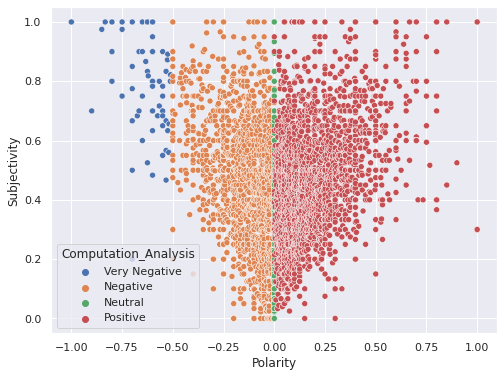

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Polarity', y='Subjectivity', hue='Computation_Analysis', data=sort_data)
plt.show()

###Computing percentage of positive, neutral and negative tweets

In [ ]:
#Percentage of positive tweets
posTweets = sort_data[sort_data.Computation_Analysis=='Positive']
posTweets = posTweets['Reviewed_Tweet']
round((posTweets.shape[0]/sort_data.shape[0] * 100), 1)

40.3

In [ ]:
#Percentage of neutral tweets
neuTweets = sort_data[sort_data.Computation_Analysis=='Neutral']
neuTweets = neuTweets['Reviewed_Tweet']
round((neuTweets.shape[0]/sort_data.shape[0] * 100), 1)

34.4

In [ ]:
#Percentage of negative tweets
negTweets = sort_data[sort_data.Computation_Analysis=='Negative']
negTweets = negTweets['Reviewed_Tweet']
round((negTweets.shape[0]/sort_data.shape[0] * 100), 1)

23.3

In [ ]:
#Percentage of very negative tweets
vnegTweets = sort_data[sort_data.Computation_Analysis=='Very Negative']
vnegTweets = vnegTweets['Reviewed_Tweet']
round((vnegTweets.shape[0]/sort_data.shape[0] * 100), 1)

2.0

###Graphical Representation of Tweet Analysis

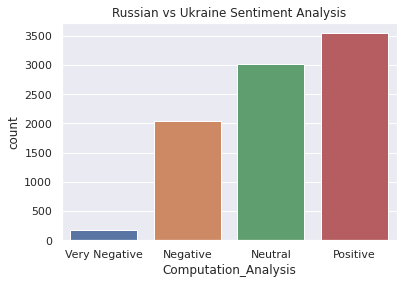

In [ ]:
sort_data['Computation_Analysis'].value_counts()
plt.title('Russian vs Ukraine Sentiment Analysis')
plt.xlabel('General Sentiment Type')
plt.ylabel('Count')
sns.countplot(x='Computation_Analysis', data=sort_data)

Text(0.5, 1.0, 'Russian VS Ukraine Sentiment Analysis')

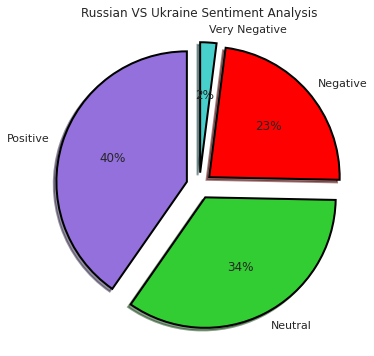

In [ ]:
fig = plt.figure(figsize=(6,6))
colors = {'mediumturquoise', 'limegreen', 'mediumpurple', 'red'}
wedgeProps = {'linewidth':2, 'edgecolor':'black'}
tags = sort_data['Computation_Analysis'].value_counts()
explode=(0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.0f%%', shadow=True, colors=colors,
         startangle=90, wedgeprops=wedgeProps, explode = explode, label='')
plt.title('Russian VS Ukraine Sentiment Analysis')

##Emotion Detection

In [ ]:
#Using a python library to determine the extent of the person's emotions(e.g. fear, anger, anticipation, ...)
sort_data['emotions'] = sort_data['Reviewed_Tweet'].apply(lambda x: NRCLex(x).affect_frequencies)
sort_data['emotions'].tail(15)

8081    {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
3054    {'fear': 0.29411764705882354, 'anger': 0.11764...
6352    {'fear': 0.0, 'anger': 0.08333333333333333, 'a...
1437    {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
2073    {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
8744    {'fear': 0.0, 'anger': 0.25, 'anticip': 0.0, '...
7293    {'fear': 0.2, 'anger': 0.0, 'anticip': 0.0, 't...
8348    {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
5699    {'fear': 0.09090909090909091, 'anger': 0.09090...
8328    {'fear': 0.05555555555555555, 'anger': 0.11111...
6928    {'fear': 0.25, 'anger': 0.25, 'anticip': 0.0, ...
1129    {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...
7353    {'fear': 0.16666666666666666, 'anger': 0.16666...
5985    {'fear': 0.3333333333333333, 'anger': 0.333333...
6288    {'fear': 0.0, 'anger': 0.08333333333333333, 'a...
Name: emotions, dtype: object

In [ ]:
#Removing column with emotions and the extent in dictionaries, extracting the type of emotions from the dictionary, concatenating as different columns into sort_data dataframe
sort_data = pd.concat([sort_data.drop(['emotions'], axis=1), sort_data['emotions'].apply(pd.Series)], axis=1)


In [ ]:
sort_data.head(5)

,Tweet,Language tweet was in,Time,Reviewed_Tweet,Subjectivity,Polarity,Computation_Analysis,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
2750,Terrible Russia. Help pay off the #loan. http...,en,00:00:19,terrible russia help pay loan httpstcoqxrvtnbm,1.0,-1.0,Very Negative,0.111111,0.111111,0.0,0.111111,0.000000,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
4447,With all these talks that Ukraine should start...,en,23:27:41,talk ukraine start negotiating russia appeas...,1.0,-1.0,Very Negative,0.176471,0.176471,0.0,0.000000,0.058824,0.058824,0.176471,0.117647,0.176471,0.000000,0.058824
5750,@RWFANATIC1337 @ArthurPickss @ScottMGreer It's...,en,23:03:47,rwfanatic arthurpickss scottmgreer nato though...,1.0,-1.0,Very Negative,0.111111,0.222222,0.0,0.000000,0.000000,0.111111,0.222222,0.111111,0.222222,0.000000,NaN
8740,"Potter is a terrible mistake, nah Russia cause...",en,22:12:18,potter terrible mistake nah russia cause nonse...,1.0,-1.0,Very Negative,0.125000,0.125000,0.0,0.000000,0.000000,0.000000,0.375000,0.250000,0.125000,0.000000,NaN
3475,@AndrewYang The Borscht whisperer here. Russi...,en,23:45:38,andrewyang borscht whisperer russia listenin ...,1.0,-1.0,Very Negative,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,NaN


In [ ]:
sort_data.tail()

,Tweet,Language tweet was in,Time,Reviewed_Tweet,Subjectivity,Polarity,Computation_Analysis,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
6928,"@MsGreatApe @UN @giladerdan1 Hmmm, which is th...",en,22:42:54,msgreatape un giladerdan hmmm greatest threat ...,1.0,1.0,Positive,0.250000,0.250000,0.0,0.000000,0.0,0.250000,0.250000,0.0,0.000000,0.000000,NaN
1129,7 Best #YouTube Advertising Agenci̗es 🌟 👉 htt...,en,00:35:48,best youtube advertising agency httpstcoht...,0.3,1.0,Positive,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,NaN
7353,"@Pontifex Go on your Popeness, do your best - ...",en,22:35:32,pontifex go popeness best say russia see mana...,0.3,1.0,Positive,0.166667,0.166667,0.0,0.166667,0.0,0.166667,0.166667,0.0,0.000000,0.000000,0.166667
5985,@acteduweininger The tooth to tail ratio for R...,en,22:59:38,acteduweininger tooth tail ratio russia best ...,0.3,1.0,Positive,0.333333,0.333333,0.0,0.000000,0.0,0.000000,0.333333,0.0,0.000000,0.000000,NaN
6288,@UN Russia at its best will lead the world to ...,en,22:54:19,un russia best lead world peace amp prosperity...,0.3,1.0,Positive,0.000000,0.083333,0.0,0.250000,0.0,0.250000,0.083333,0.0,0.083333,0.083333,0.166667


###Data cleaning for the new rows added

In [ ]:
#Checking for null values
sort_data.isnull().sum()

Tweet                       0
Language tweet was in       0
Time                        0
Reviewed_Tweet              0
Subjectivity                0
Polarity                    0
Computation_Analysis        0
fear                        0
anger                       0
anticip                     0
trust                       0
surprise                    0
positive                    0
negative                    0
sadness                     0
disgust                     0
joy                         0
anticipation             5147
dtype: int64

####Addressing null values and irrelevant columns

In [ ]:
#Dropping irrelevant data column -> anticip
sort_data.drop('anticip', axis=1, inplace=True)

In [ ]:
#Checking the columns in sort_data
sort_data.columns

Index(['Tweet', 'Language tweet was in', 'Time', 'Reviewed_Tweet',
       'Subjectivity', 'Polarity', 'Computation_Analysis', 'fear', 'anger',
       'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust',
       'joy', 'anticipation'],
      dtype='object')

In [ ]:
#Taking care of null values in anticipation
sort_data['anticipation'] = sort_data['anticipation'].fillna(0)

In [ ]:
#Confirming that there are no null values
sort_data.isnull().sum()

Tweet                    0
Language tweet was in    0
Time                     0
Reviewed_Tweet           0
Subjectivity             0
Polarity                 0
Computation_Analysis     0
fear                     0
anger                    0
trust                    0
surprise                 0
positive                 0
negative                 0
sadness                  0
disgust                  0
joy                      0
anticipation             0
dtype: int64

In [ ]:
#Overview of dataframe
sort_data.head()

,Tweet,Language tweet was in,Time,Reviewed_Tweet,Subjectivity,Polarity,Computation_Analysis,fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
2750,Terrible Russia. Help pay off the #loan. http...,en,00:00:19,terrible russia help pay loan httpstcoqxrvtnbm,1.0,-1.0,Very Negative,0.111111,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
4447,With all these talks that Ukraine should start...,en,23:27:41,talk ukraine start negotiating russia appeas...,1.0,-1.0,Very Negative,0.176471,0.176471,0.000000,0.058824,0.058824,0.176471,0.117647,0.176471,0.000000,0.058824
5750,@RWFANATIC1337 @ArthurPickss @ScottMGreer It's...,en,23:03:47,rwfanatic arthurpickss scottmgreer nato though...,1.0,-1.0,Very Negative,0.111111,0.222222,0.000000,0.000000,0.111111,0.222222,0.111111,0.222222,0.000000,0.000000
8740,"Potter is a terrible mistake, nah Russia cause...",en,22:12:18,potter terrible mistake nah russia cause nonse...,1.0,-1.0,Very Negative,0.125000,0.125000,0.000000,0.000000,0.000000,0.375000,0.250000,0.125000,0.000000,0.000000
3475,@AndrewYang The Borscht whisperer here. Russi...,en,23:45:38,andrewyang borscht whisperer russia listenin ...,1.0,-1.0,Very Negative,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000


###Measuring the correlation between the features

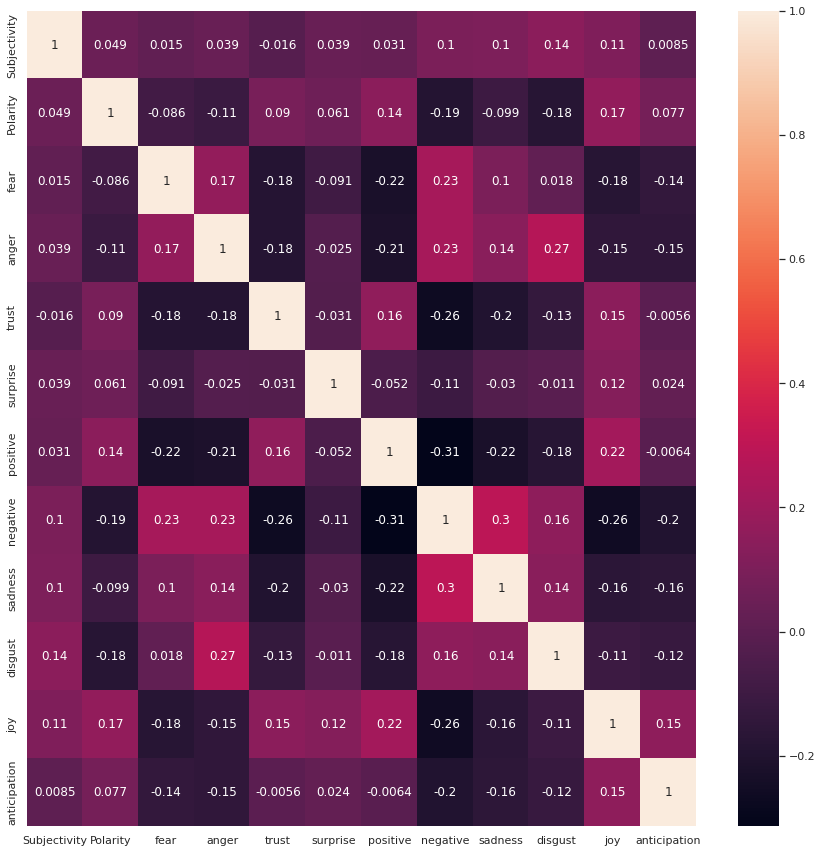

In [ ]:
corr_matrix = sort_data.corr()
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

##Measuring Baseline Performance

####Logistic Regression

#####Vectorising Training Dataset

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(sort_data['Reviewed_Tweet'])

#####Feature Engineering

In [ ]:
#Getting the feature names from the vectorised features
feature_names = vect.get_feature_names()
#Extract Feature
X = sort_data['Reviewed_Tweet']
#Extract Target
Y = sort_data['Computation_Analysis']
#Transforming feature data
X = vect.transform(X)
#Split arrays or matrices into random train and test subsets. In this case, 80:20 Train:Test ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

##### Training model

In [ ]:
#Setting model
logreg=LogisticRegression()

In [ ]:
#Fitting feature and target to the model
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#Finding Accuracy of data
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 75.21%


######Printing the classification report based on performance of the model

In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[234  91  95   1]
 [ 16 512  39   0]
 [ 44 113 575   0]
 [ 11  21   5   2]]


               precision    recall  f1-score   support

     Negative       0.77      0.56      0.64       421
      Neutral       0.69      0.90      0.79       567
     Positive       0.81      0.79      0.80       732
Very Negative       0.67      0.05      0.10        39

     accuracy                           0.75      1759
    macro avg       0.73      0.57      0.58      1759
 weighted avg       0.76      0.75      0.74      1759



######Data Visualisation of classification report

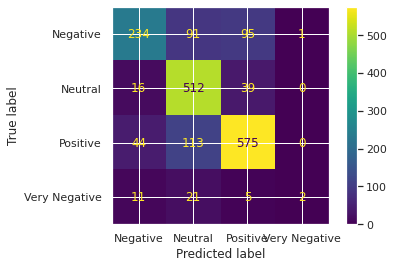

In [ ]:
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

#####Hyper Parameter Tuning

In [ ]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
#Find the best parameters
print('Best parameter:', grid.best_params_)

Best parameter: {'C': 10}


In [ ]:
# Predicting target based on test feature
y_pred = grid.predict(x_test)

In [ ]:
#Calculating Accuracy
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:2f}%".format(logreg_acc*100))

Test accuracy: 76.179648%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[234  91  95   1]
 [ 16 512  39   0]
 [ 44 113 575   0]
 [ 11  21   5   2]]


               precision    recall  f1-score   support

     Negative       0.77      0.56      0.64       421
      Neutral       0.69      0.90      0.79       567
     Positive       0.81      0.79      0.80       732
Very Negative       0.67      0.05      0.10        39

     accuracy                           0.75      1759
    macro avg       0.73      0.57      0.58      1759
 weighted avg       0.76      0.75      0.74      1759



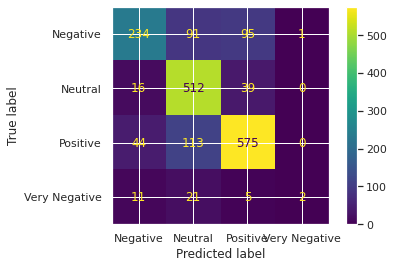

In [ ]:
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

##Model 2:Decision Tree Classifier

In [ ]:
#Initialising the classifier
dt = DecisionTreeClassifier()

In [ ]:
#Training the model
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Perform prediction
dt_pred = dt.predict(x_test)
# Calculate Accuracy
dt_acc = accuracy_score(dt_pred, y_test)
print("Test accuracy: {:2f}%".format(dt_acc*100))

Test accuracy: 80.216032%


| Logistic Regression| Decision Tree |
| :-----------: | :-----------: |
| 76.179648% | 80.216032% |